<a href="https://colab.research.google.com/github/shoaibahmad0/Intro-to-Data_Science/blob/main/Optimizing_kidney_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [13]:
import pandas as pd

csv_path = '/content/drive/MyDrive/kidneyData.csv'
data = pd.read_csv(csv_path)
print(data.head())

   Unnamed: 0       image_id  \
0           0  Tumor- (1044)   
1           1    Tumor- (83)   
2           2   Tumor- (580)   
3           3  Tumor- (1701)   
4           4  Tumor- (1220)   

                                                path   diag  target  Class  
0  /content/data/CT KIDNEY DATASET Normal, CYST, ...  Tumor       3  Tumor  
1  /content/data/CT KIDNEY DATASET Normal, CYST, ...  Tumor       3  Tumor  
2  /content/data/CT KIDNEY DATASET Normal, CYST, ...  Tumor       3  Tumor  
3  /content/data/CT KIDNEY DATASET Normal, CYST, ...  Tumor       3  Tumor  
4  /content/data/CT KIDNEY DATASET Normal, CYST, ...  Tumor       3  Tumor  


In [14]:
import os

image_folder = '/content/drive/MyDrive/DataSets/'
images = os.listdir(image_folder)
print(images[:5])


['Tumor', 'Cyst', 'Stone', 'Normal']


In [16]:
import os

image_folder = '/content/drive/MyDrive/DataSets'
classes = os.listdir(image_folder)
print("Classes (Types) in Dataset:", classes)


Classes (Types) in Dataset: ['Tumor', 'Cyst', 'Stone', 'Normal']


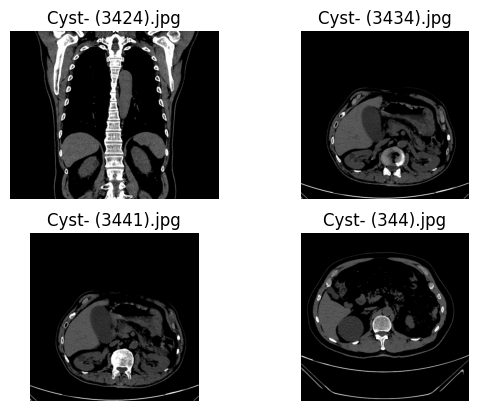

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

type_folder = os.path.join(image_folder, 'Cyst')  # Change 'Type1' to your desired folder
images = os.listdir(type_folder)

# Print the first few images
for i, image_name in enumerate(images[:4]):  # Adjust the number of images to display
    img_path = os.path.join(type_folder, image_name)
    img = mpimg.imread(img_path)
    plt.subplot(2, 2, i + 1)  # 2x2 grid for displaying images
    plt.imshow(img)
    plt.title(image_name)
    plt.axis("off")

plt.show()


In [19]:
dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/DataSets',
    image_size=(224, 224),
    batch_size=32
)


Found 12476 files belonging to 4 classes.


In [20]:
for images, labels in dataset.take(1):
    print("Shape of images batch:", images.shape)
    print("Labels batch:", labels.numpy())

Shape of images batch: (32, 224, 224, 3)
Labels batch: [3 3 0 3 0 3 0 0 1 3 0 0 1 3 2 2 1 0 1 0 1 2 2 1 1 2 1 3 1 1 1 1]


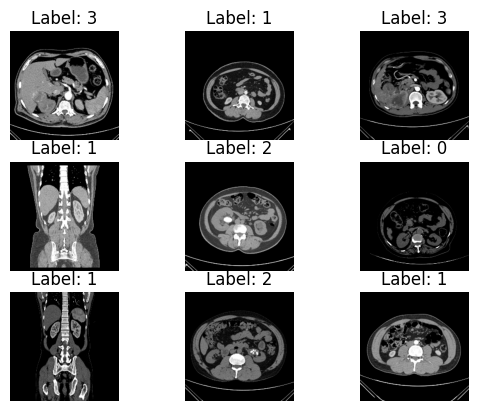

In [22]:
import matplotlib.pyplot as plt

for images, labels in dataset.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")
    plt.show()
